### Visualizing accidents severity with the focus on extracted features with importance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from plotnine import *

pd.set_option('display.max_columns', None)

df_collisions = pd.read_csv(os.path.join('../0_data', 'collisions_data_2000_2022.csv'), usecols = ['accident_index', 
                                                                   'accident_year',
                                                                   'longitude',
                                                                   'latitude',  
                                                                   'accident_severity',
                                                                   'number_of_casualties',
                                                                   'junction_detail',
                                                                   'speed_limit',
                                                                   'road_type',
                                                                   'urban_or_rural_area'], low_memory = False)

##### The total number of road accidents has been steadily decreasing over the studied period. However, fatal accidents have shown fluctuations, hovering around 1500 cases annually since 2012 and reaching their lowest point in 2020. The number of slight accidents has been decreasing over the given period, leading to an increase in the share of fatal accidents from 2014 to 2020, even though the absolute number of fatal accidents remained approximately the same.

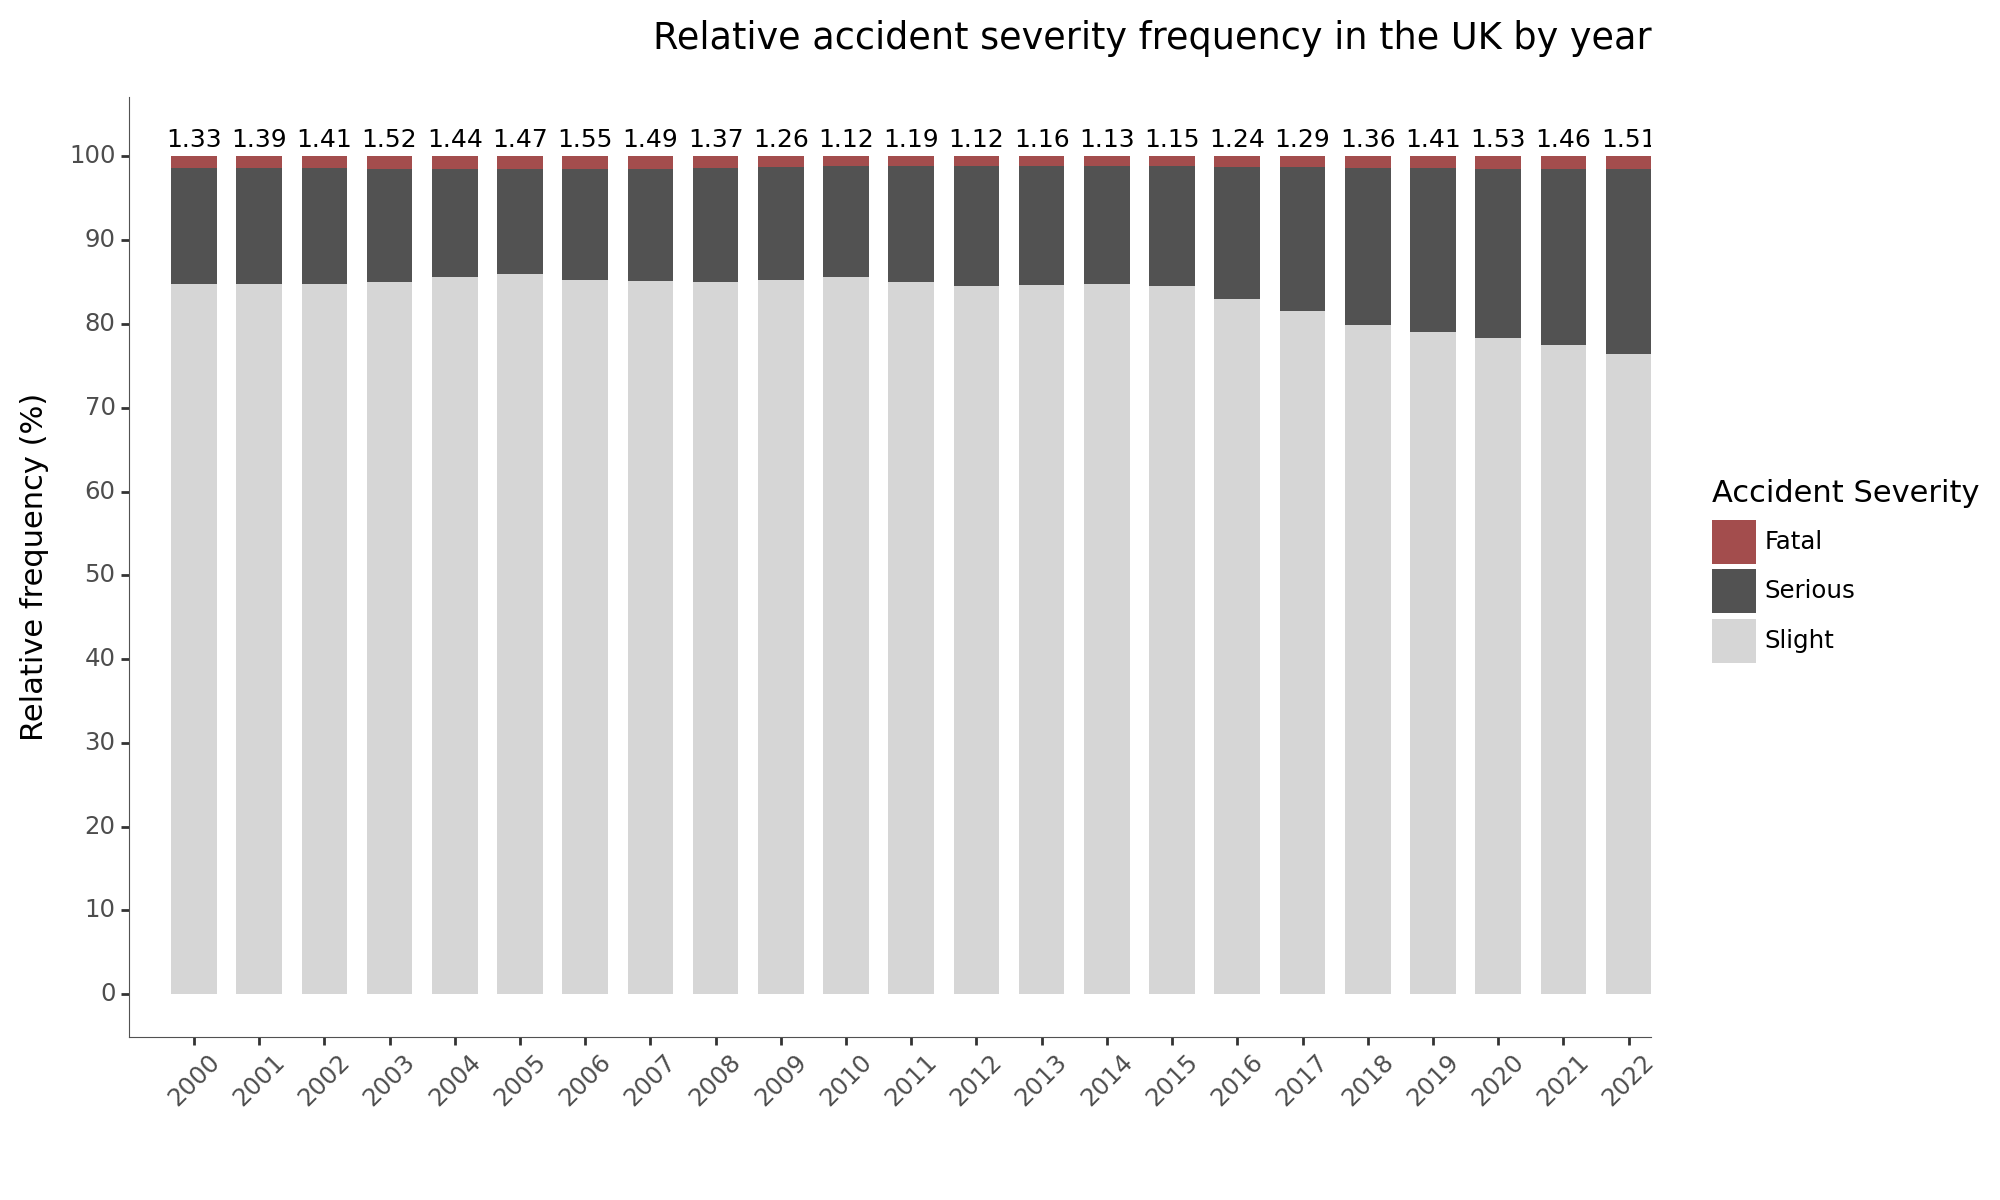

In [3]:
### Relative accident severity frequency in the UK by year
accident_severity_by_year = df_collisions.groupby(['accident_year', 'accident_severity']).size().reset_index(name='count')

# Calculate percentage distribution
accident_severity_by_year['percent'] = (
    accident_severity_by_year.groupby('accident_year')['count']
    .transform(lambda x: (x / x.sum()) * 100)
)

accident_severity = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

accident_severity_by_year['accident_severity'] = accident_severity_by_year['accident_severity'].map(accident_severity)

plot_accident_severity_by_year = (
    ggplot(accident_severity_by_year, aes('accident_year', 'percent', fill='factor(accident_severity)')) +
    geom_col(width=0.7) + 
    geom_text(
        aes(label='round(percent, 2)', y=102), 
        data=accident_severity_by_year[accident_severity_by_year['accident_severity'] == 'Fatal'],
        position='stack', size=9, color='black'
    ) + 
    labs(title='Relative accident severity frequency in the UK by year', x='Accident Year', y='Relative frequency (%)') +
    theme_classic() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(2000, int(accident_severity_by_year['accident_year'].max()) + 1, 1),
                       labels=range(2000, int(accident_severity_by_year['accident_year'].max()) + 1, 1),
                       limits=(1999, None),
                       expand=(0, 0)) +
    scale_y_continuous(breaks=range(0, int(accident_severity_by_year['percent'].max()) + 20, 10),
                       labels=lambda x: ["{:,}".format(label) for label in x])+
    scale_fill_manual(name='Accident Severity', values=["#A34D4D", "#525252", "#D6D6D6"]) 
)

print(plot_accident_severity_by_year)

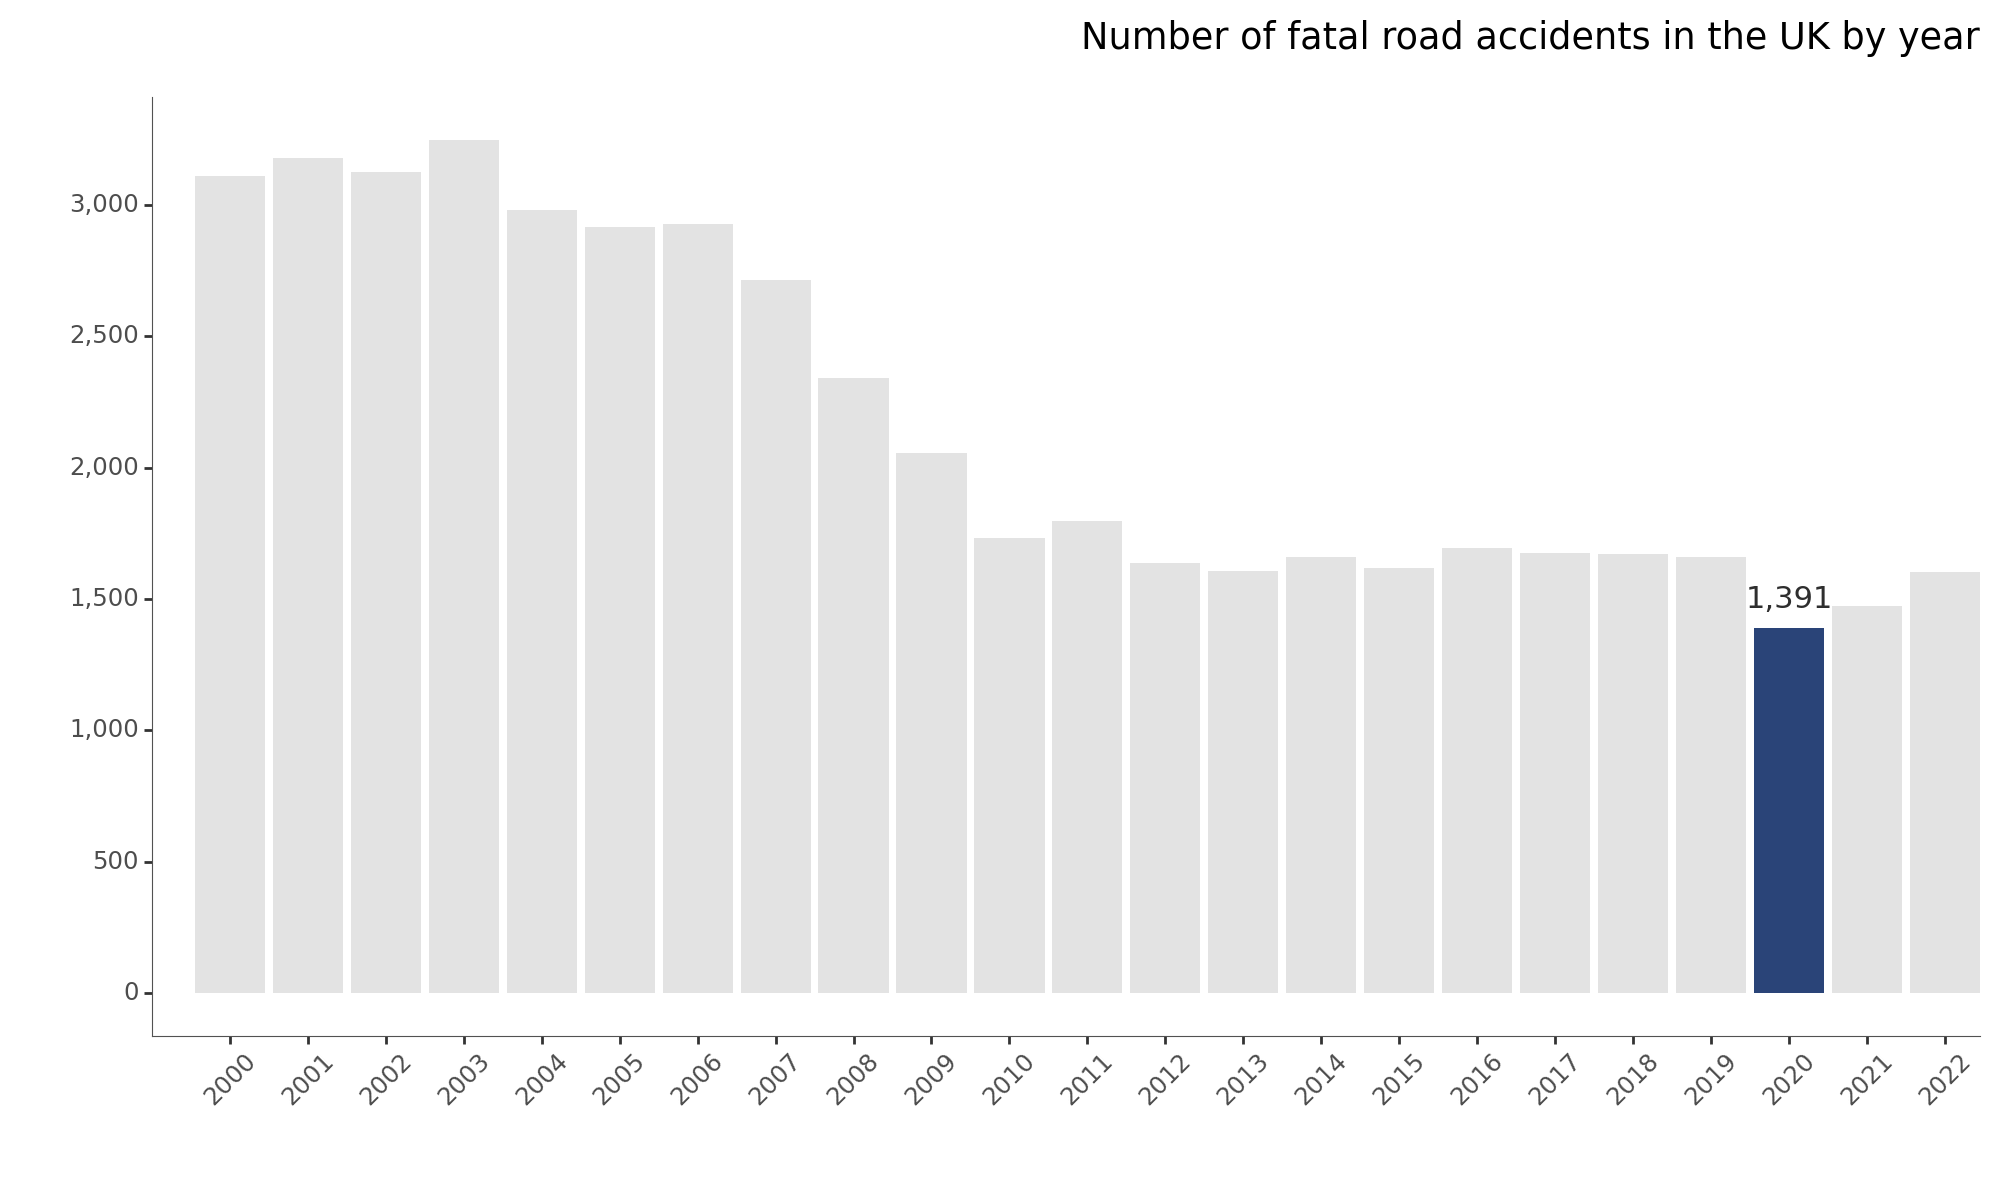

In [4]:
### Fatal accidents by year
df_accident_severity_by_year_fatal = accident_severity_by_year.loc[accident_severity_by_year['accident_severity'] == 'Fatal']

plot_accident_severity_by_year_fatal = (
    ggplot(df_accident_severity_by_year_fatal, aes(x='accident_year', y='count')) +
    geom_bar(stat='identity', fill='#e3e3e3') +
    geom_bar(df_accident_severity_by_year_fatal[df_accident_severity_by_year_fatal['accident_year'] == 2020], aes(x='accident_year', y='count'), fill='#2a4478', stat='identity') +
    geom_text(df_accident_severity_by_year_fatal[df_accident_severity_by_year_fatal['accident_year'] == 2020], aes(x='accident_year', y='count', label='count'), color='#2e2e2e', va='bottom', size=11, nudge_y=50, format_string="{:,}") +
    labs(title='Number of fatal road accidents in the UK by year') +
    theme_classic() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(2000, int(df_accident_severity_by_year_fatal['accident_year'].max()) + 1, 1),
                       labels=range(2000, int(df_accident_severity_by_year_fatal['accident_year'].max()) + 1, 1),
                       limits=(1999, None),
                       expand=(0, 0)) +
    scale_y_continuous(breaks=range(0, int(df_accident_severity_by_year_fatal['count'].max()) + 1, 500),
                       labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot_accident_severity_by_year_fatal)

##### The number of accidents in urban areas amounts to 1,284,068, constituting approximately 34.82% of the total. Conversely, rural areas experienced a higher number of accidents, totaling 2,403,681, making up approximately 65.18% of the overall accident count. In summary, over the specified 22-year duration, rural areas recorded a higher percentage of accidents compared to urban areas.

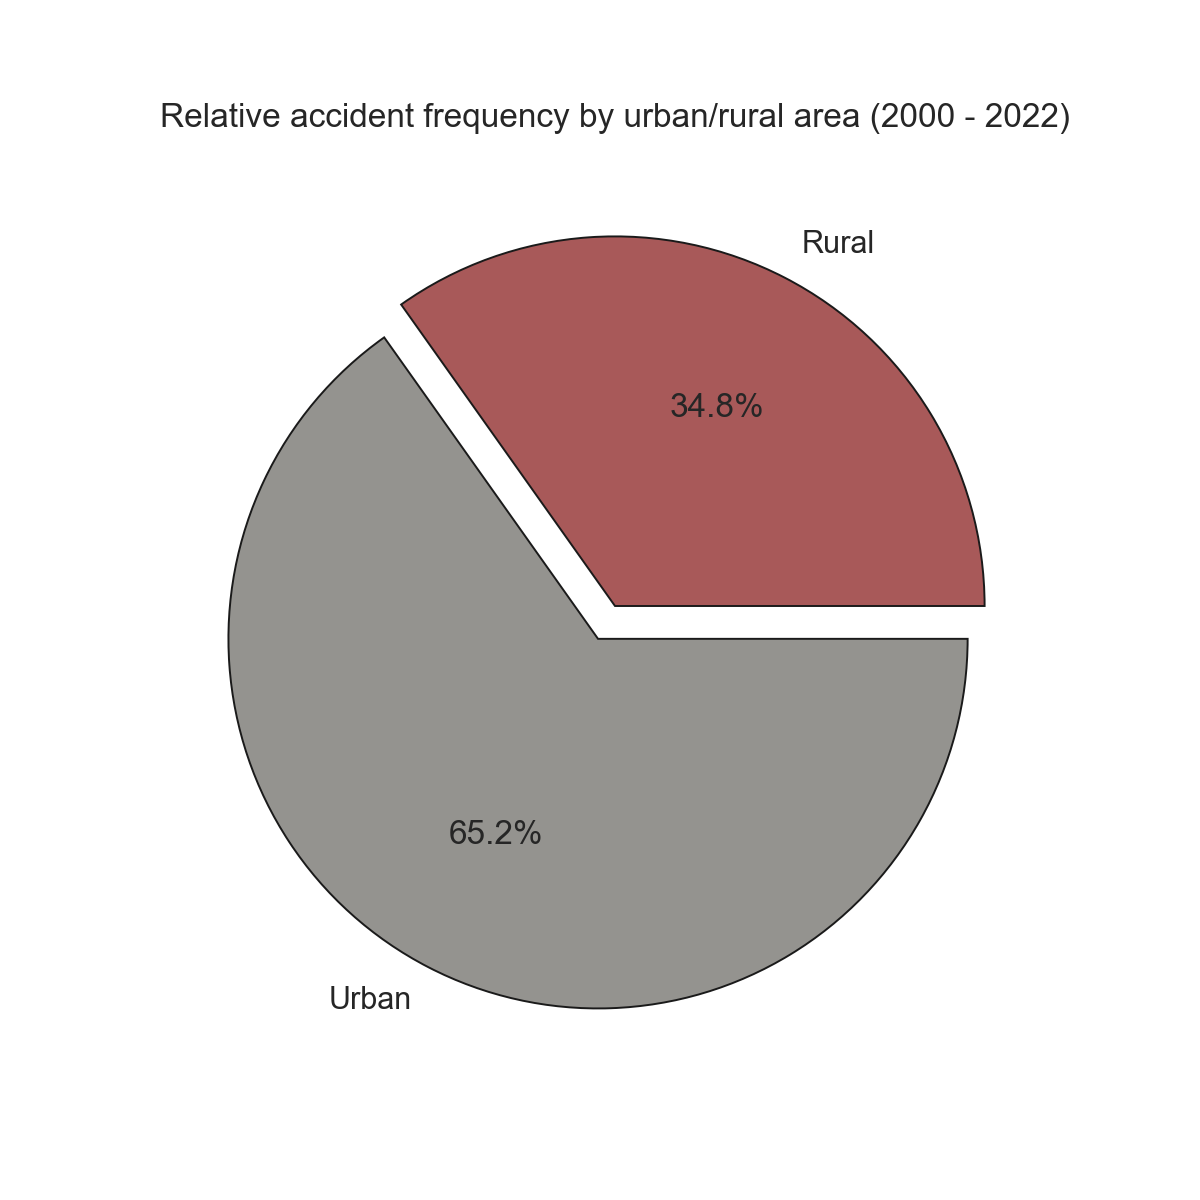

In [5]:
### Relative accident frequency by urban/rural areas
df_collisions_filtered = df_collisions[df_collisions['urban_or_rural_area'].isin([1, 2])]

urban_rural = {
    1: 'Urban',
    2: 'Rural'
}

df_collisions_filtered.loc[:, 'urban_or_rural_area'] = df_collisions_filtered['urban_or_rural_area'].map(urban_rural)

df_urban_or_rural_area = (
    df_collisions_filtered.groupby('urban_or_rural_area').size()
    .reset_index(name='accident_count')
)

# Calculate percentage
total_accidents = df_urban_or_rural_area['accident_count'].sum()
df_urban_or_rural_area['percentage'] = (df_urban_or_rural_area['accident_count'] / total_accidents) * 100

sns.set(style="whitegrid")
custom_colors = sns.color_palette(["#a85959", "#94938f"])
plt.figure(figsize=(6, 6))
explode = (0, 0.1)

plt.pie(df_urban_or_rural_area['percentage'], 
        autopct='%1.1f%%',
        colors=custom_colors, 
        explode=explode,
        labels=df_urban_or_rural_area['urban_or_rural_area'],
        wedgeprops={"edgecolor":"k",'linewidth': 0.7, 'antialiased': True})

plt.title('Relative accident frequency by urban/rural area (2000 - 2022)')

plt.show()

##### The data highlights an interesting pattern: in rural areas, there are more fatal accidents, making up 2.47%, while in urban areas, it's lower at 0.75%. Serious accidents are also more common in rural areas, accounting for a big portion at 17.56%, whereas in cities, it's a bit lower at 13.27%. One reason for this difference could be that there's more traffic in cities, so accidents happen more often, but they're usually not as serious. On the other hand, rural areas might have higher speed limits, which means when accidents do happen, they tend to be more severe.

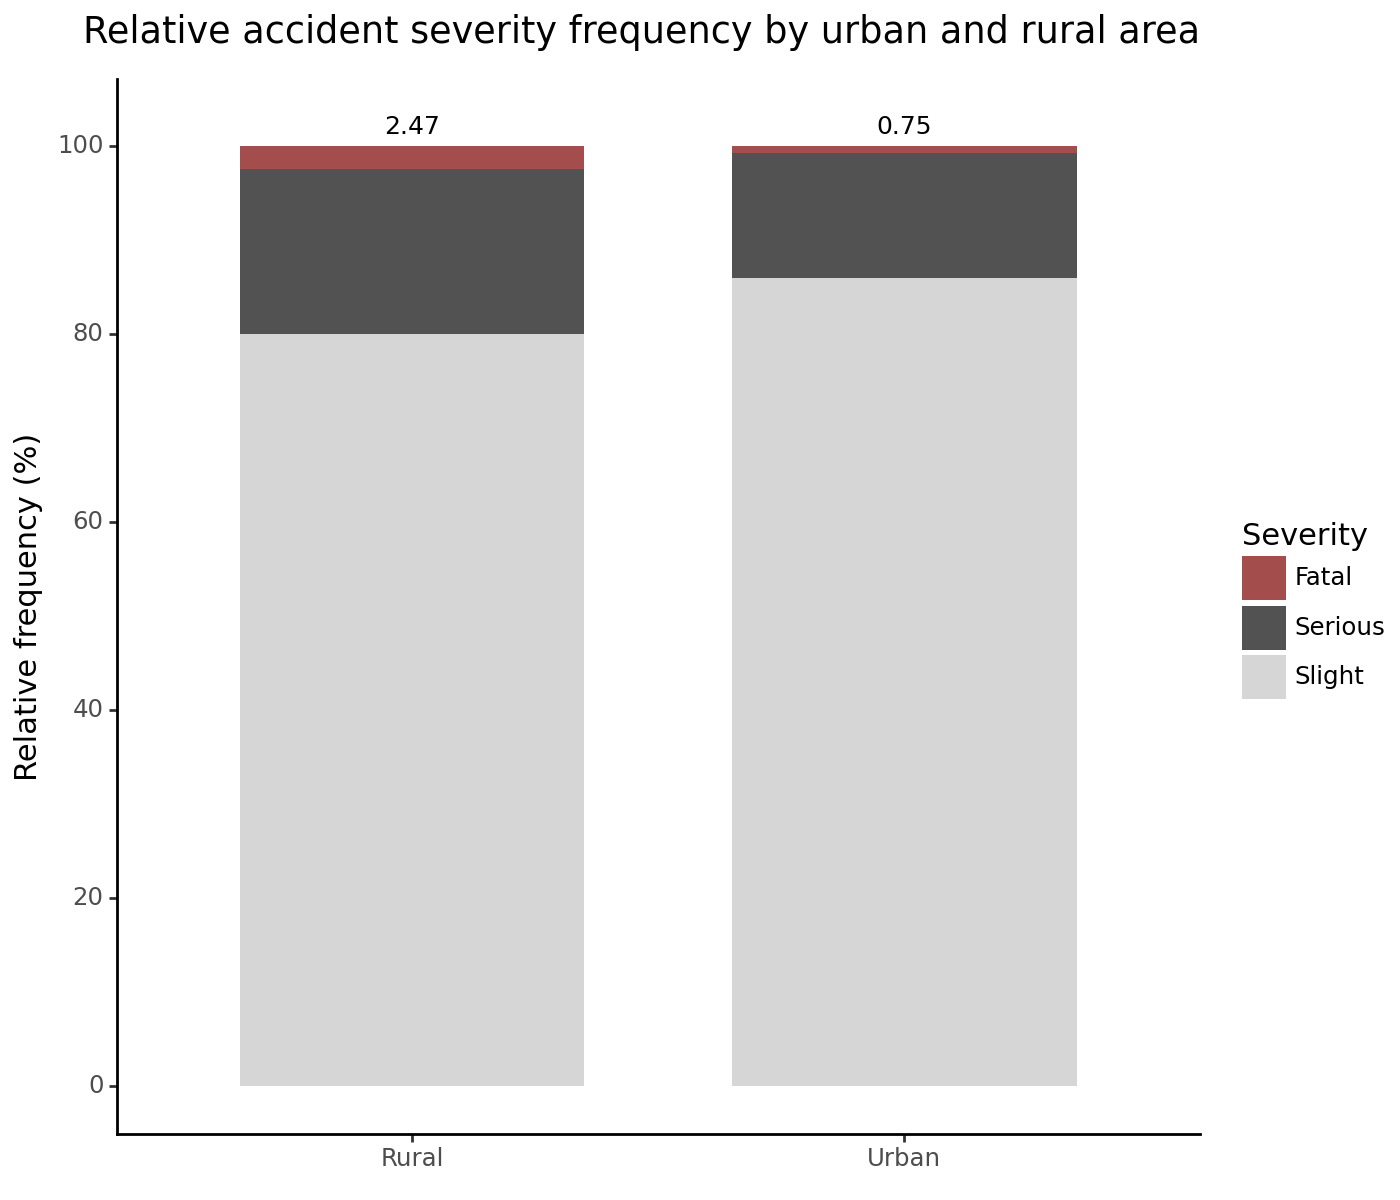

In [10]:
### Relative accident frequency by urban and rural area (with severity)
accident_severity_by_urban_rural = df_collisions_filtered.groupby(['urban_or_rural_area', 'accident_severity']).size().reset_index(name='count')

# Calculate percentages within each group (urban and rural)
accident_severity_by_urban_rural['percent'] = (
    accident_severity_by_urban_rural.groupby('urban_or_rural_area')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)  
)

accident_severity = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

accident_severity_by_urban_rural['accident_severity'] = accident_severity_by_urban_rural['accident_severity'].map(accident_severity)

plot_accident_severity_by_urban_rural = (
    ggplot(accident_severity_by_urban_rural, aes('urban_or_rural_area', 'percent', fill='factor(accident_severity)')) +
    geom_text(
        aes(label='round(percent, 2)', y=102), 
        data=accident_severity_by_urban_rural[accident_severity_by_urban_rural['accident_severity'] == 'Fatal'],
        position='stack', size=9, color='black'
    ) +
    geom_col(width=0.7) + 
    labs(title='Relative accident severity frequency by urban and rural area', x='urban_or_rural_area', y='Relative frequency (%)') +
    theme_classic() +
    theme(
        axis_title_y=element_text(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(hjust=0.5),
        axis_text_y=element_text(),
        plot_title=element_text(hjust=1), 
        axis_title_x=element_blank(), 
        legend_title=element_text(),
        legend_text=element_text(),     
        figure_size=(7, 6) 
    ) + 
    scale_y_continuous(breaks=range(0, int(accident_severity_by_urban_rural['percent'].max()) + 20, 20),
                       labels=lambda x: ["{:,}".format(label) for label in x])+
    scale_fill_manual(name='Severity', values=["#A34D4D", "#525252", "#D6D6D6"]) 
)

print(plot_accident_severity_by_urban_rural)